<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# **<center>Face Recognition**<br>
<br>
<br>
<br>
<br>

## <center>Authors: 
## <center>Sera Kaplan, Sarah Manderschied, Lejla Mesic, Emilia Thiel<br>
<br>
<br>

## <center>July 2023

<div style="page-break-after: always;"></div>


## Abstract

## Table of contents

**1. [Introduction](#Introduction)**

1. [Our Dataset](#our-dataset)
    
**2. [Methods](#Methods)**

1. [Z-transformation](#z-transformation)

2. [Principle component analysis (PCA)](#principle-component-analysis-pca)

3. [Implementing K-nearest neighbors (KNN) algorithm](#implementing-k-nearest-neighbors-knn-algorithm)

**4. [Results](#results)**

1. [Data split](#data-split)

2. [PCA](#pca)

3. [KNN](#knn)

**5. [Discussion](#discussion)**

1. [Error Analysis and Improvement](#error-analysis-and-improvement)

**6. [References](#references)**

<div style="page-break-after: always;"></div>


## Introduction

### Our dataset

## Methods

### z-transformation

z-Transformation, also known as standardization or normalization, is a statistical technique used to transform a distribution by subtracting the mean and dividing by the standard deviation. The purpose is to standardize the data so that it has a mean of 0 and a standard deviation of 1. In this project, the z-transformation is applied to the feature vectors representing the facial images. Before applying z- transformation to a matrix of pixel values, it was important to flatten the 2D image into a 1D array and assign it to pixel values, which were stored in one list. After all pixel values from all images are combined and stored into a list, it was transformed into a matrix. Z-Transformation calculates standard deviation for each row in that matrix and if the standard deviation is zero, it subtracts the mean from the row, if not, it calculates the mean of the row and performs z-transformation by subtracting the mean and dividing by the standard deviation. After performing all rows in the input ‘Matrix’ the transformed matrix is returned.
$$Z =\frac{X-\mu (X)}{\sigma (X)} \hspace{1cm} (1)$$

### Principle component analysis (PCA) 

PCA is a popular dimensionality reduction technique used to reduce the number of features in a dataset while preserving the most important information. In this project, the PCA class was imported and used from the scikit-learn library. The **fit ()** method of the PCA is called to fit the model to the transformed data obtained from the z-transformation. **Transform ()** method was used to project the data onto the lower-dimensional space defined by the principal components. The resulting transformed data that contains the new feature vector in the reduced dimensional space is used for further modeling tasks.

### Implementing K-nearest neighbors (KNN) algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point **Quelle1**  
It is one of the simplest machine learning algorithms that makes predictions based on the similarity of input data to its neighboring samples. In this project the KNN algorithm was utilized to match and classify faces. The “KNeighborsClassifier” class from the scikit-learn library was imported and used to create an KNN classifier **Quelle2**. 
As parameters, k value was determined, but also other values according to sklearn such as:
*	Weights: which was set to ‘distance’ to give more weight to closer neighbors, 
*	Algorithm: which was set to ‘auto’ to attempt to decide the most appropriate algorithm based on the values passed to fit method
*	Metric: which was set to ‘manhattan’ for distance calculation using Manhattan distance $$ (\sum_{i=1}^{k}{|xi-yi|}) \hspace{1cm} (2)$$
*	leaf size: which was set to 30 (default) for efficient tree construction

After that, KNN classifier was trained using the transformed data, which represents the feature vectors of the training dataset and corresponding labels of the individuals in the training set. During training, the KNN classifier learns the patterns and relationships between the transformed data and their corresponding labels. The classifier uses the training data to build an internal representation or model that allows it to make predictions on test data. The dataset that represents the feature vectors of the test faces is transformed using the same PCA transformation used for the training data. This transformation ensures consistency in the feature representation between the training and test dataset. The transformed test data was then passed to the KNN classifier’s **predict ()** method, which utilizes the trained model to predict the identities or labels of the test faces.

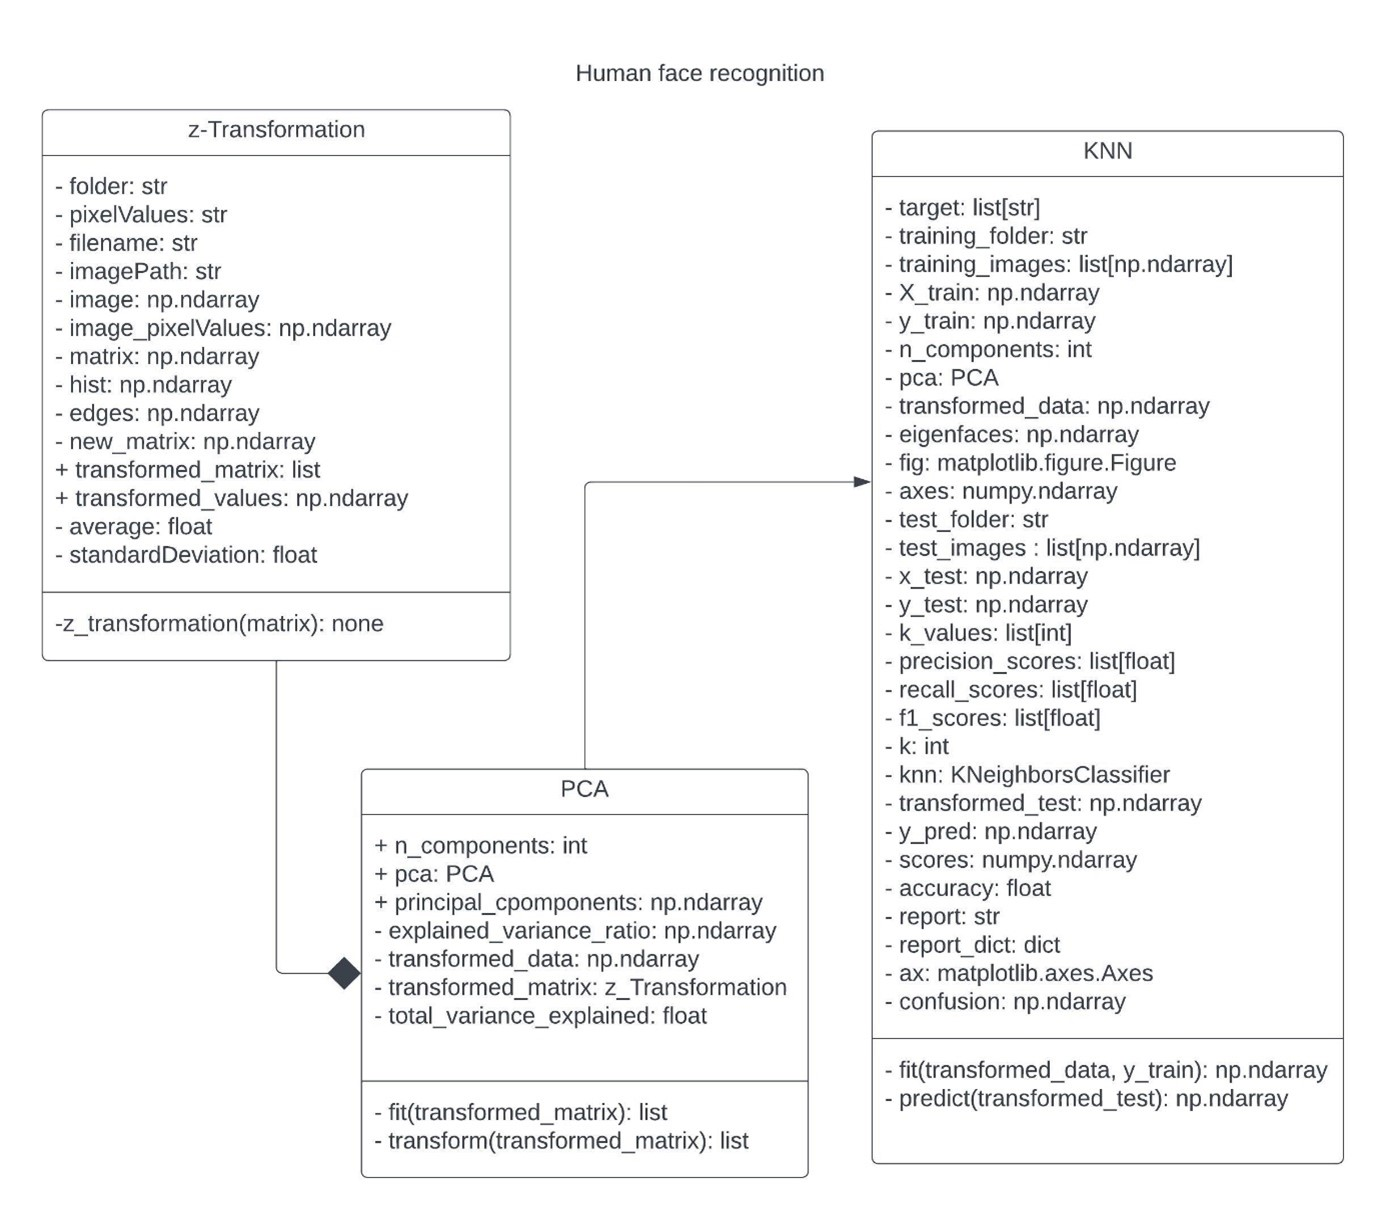

In [3]:
from IPython.display import Image, display
display(Image(filename='pictures_for_report/UML Class Diagram.jpg', width=448, height = 32))

**<span style="font-size:0.8em;">Figure 1: UML Class Diagram.</span>**

Figure 1 shows the class diagram of our classes. The relationship between **‘z-Transformation’** and **‘PCA’** can be seen as composition, which means that one cannot exist without the other. The **‘PCA’** class depends on the **‘z-Transformation’** for the transformed matrix and uses it as part of its computation. However, the relationship between **‘PCA’** and **‘KNN’** is a simple dependency. The **‘KNN’** class depends on **‘PCA’** class for the *‘pca’* object and the *‘transformed_data’* variable. 

## Results


 
### Data split

Text(0.5, 1.0, 'Frequency of pixel values after transformation')

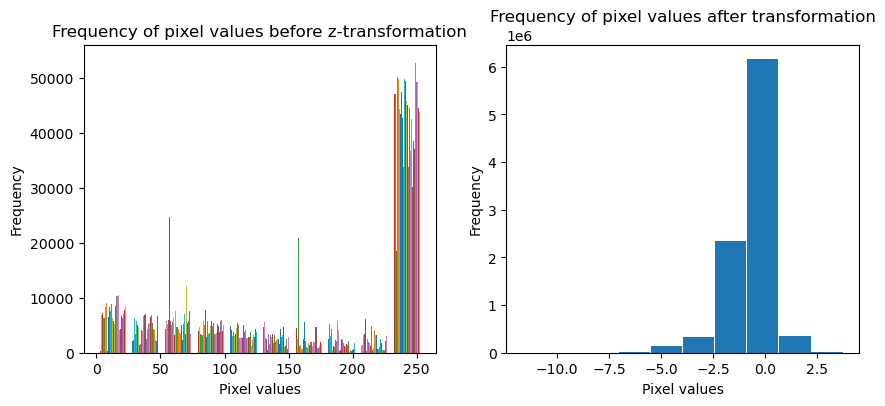

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from z_transformation import matrix, transformed_values

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  

plt.subplot(121)
plt.hist(matrix, color = None)
plt.title("Frequency of pixel values before z-transformation")
plt.xlabel("Pixel values")
plt.ylabel("Frequency")

plt.subplot(122)
hist, edges = np.histogram(transformed_values)
plt.bar(edges[:-1], hist, width=1.5)
plt.xlabel("Pixel values")
plt.ylabel("Frequency")
plt.title("Frequency of pixel values after transformation")

**<span style="font-size:0.8em;">Figure 2: Frequency of pixel values before and after transformation.</span>**

The z-transformation’s success was checked with the values of the mean and standard deviation of the transformed data. The histograms are shown in figure 2. 
The goal was to achieve a standard normal distribution with the z-transformation. This distribution is defined by a mean value of one and a standard deviation of zero. Therefore, to check whether the transformation was successful, the mean and standard deviation were calculated. The mean of transformed data was 1.8312017045227656 * 10<sup>-17</sup>  and the standard deviation was 1.0000000000000004.
Figure 2 visualizes the transformation of the data by depicting the distribution of the pixel values before and after the z-transformation. While figure 2 on the left shows a large distribution of the values between 0 and 255, the transformed data lies within -7 and 3. 



### PCA

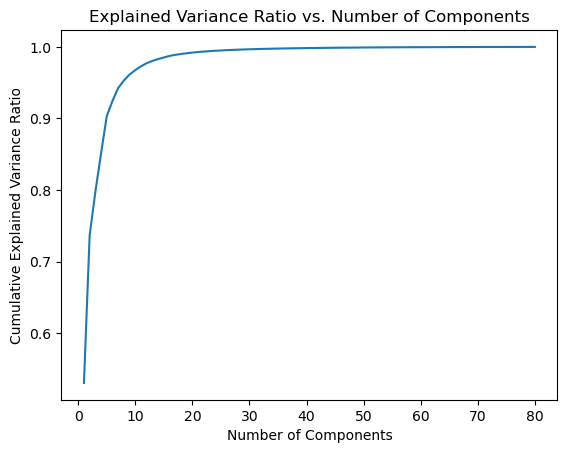

In [5]:
from PCA import n_components, explained_variance_ratio

plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

**<span style="font-size:0.8em;">Figure 3: cumulative explained Variance Ratio of the number of components.</span>**

The graph in figure 3 was used to determine the numbers of principal components of the PCA. It shows the cumulative variance that is explained by the numbers of principal Components. We chose 80 principal components. That causes a total variance explained of 98.85 %.
The curve shows a horizontal asymptotic behavior towards one. It increases exponentially in the beginning. As the number of components increases, the cumulative explained variance ratio continues to grow, but at a slower rate. 


### KNN

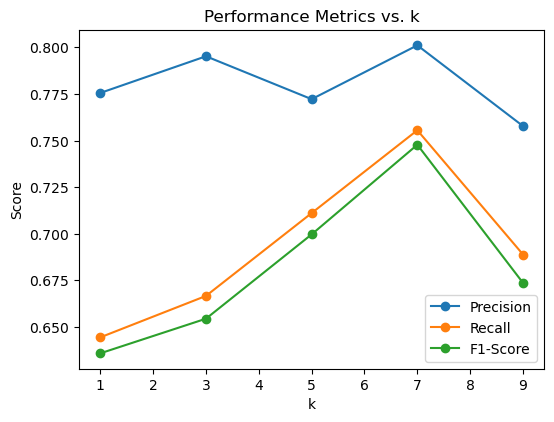

In [27]:
from KNN import k_values, precision_scores, recall_scores, f1_scores

plt.figure(figsize=(6, 4.4))
plt.plot(k_values, precision_scores, marker='o', label='Precision')
plt.plot(k_values, recall_scores, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1-Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.show()

**<span style="font-size:0.8em;">Figure 4: precision, recall and F1-score of different numbers of k.</span>**

K is an integer that identifies the number of closest pictures in the training data that are compared to the given picture to determine its label. [a]
Looking at figure 4, it becomes visible that if k = 7, the three curves of precision, recall and f1-score reach a global maximum. Therefore, k = 7 was chosen for our KNN algorithm.

Precision describes the true positive results divided by all positive results [b]:
$$ precision = \frac{TP}{TP + FP} \hspace{1cm} (3)$$

Recall are the true positive results divided by true positive and false negative [b]:
$$ recall = \frac{TP}{TP + FN} \hspace{1cm} (4)$$

F1-Score stands for the mean of recall and precision [b]:
$$ f1-score = 2 \frac{precision * recall}{precision + recall} \hspace{1cm} (5)$$

Accuracy refers to the distance between the quantity measured and the actual value of the quantity. [c]
Together with the number of principal components = 80, our accuracy is 75.56 %.



Due to the fact that our training set is small (only 165 pictures in total and 120 in the training set) a k-fold cross validation was additionally imported from scikit-learn with five folds. The average accuracy obtained from the cross fold validation was 71.99 %.

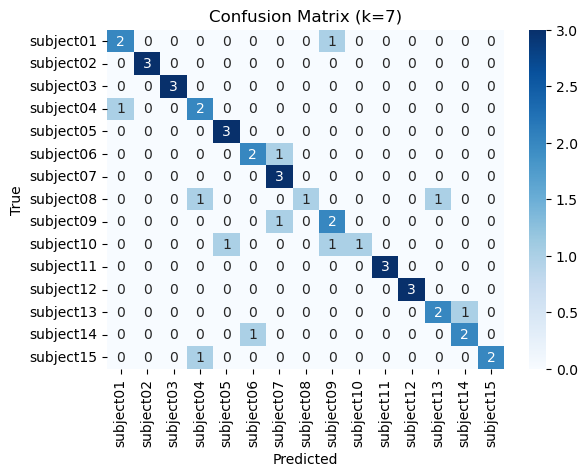

In [22]:
import seaborn as sns
from KNN import confusion_matrix, y_test, y_pred, target, k

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6.4, 4.4))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (k={k})')
plt.show()

**<span style="font-size:0.8em;">Figure 5: Confusion Matrix for k=7.</span>**

The test set consists of three pictures of each subject. The confusion matrix in figure 5 shows what each of the subjects was recognized as. If all three test pictures of all subjects were recognized correctly, there would be a square diagonal matrix with the number three in the diagonal.

In [7]:
from KNN import report
from KNN import k

print("\033[1mTable 1: Detailed classification report.\033[0m")
print()
print(report)

Table 1: Detailed classification report.

              precision    recall  f1-score   support

   subject01       0.67      0.67      0.67         3
   subject02       1.00      1.00      1.00         3
   subject03       1.00      1.00      1.00         3
   subject04       0.50      0.67      0.57         3
   subject05       0.75      1.00      0.86         3
   subject06       1.00      0.67      0.80         3
   subject07       0.60      1.00      0.75         3
   subject08       1.00      0.33      0.50         3
   subject09       0.50      0.67      0.57         3
   subject10       1.00      0.33      0.50         3
   subject11       1.00      1.00      1.00         3
   subject12       1.00      1.00      1.00         3
   subject13       0.67      0.67      0.67         3
   subject14       0.75      1.00      0.86         3
   subject15       1.00      0.67      0.80         3

    accuracy                           0.78        45
   macro avg       0.83      0.78     

The classification report in table 1 shows the precision, recall and f1-score of the different subjects.

## Discussion

First, the data set of 165 pictures was divided into a test and a training set. The test set consists of approximately 27 % of the pictures with three per subject (only 11 per subject in the data set). 
The first step was to do a z-transformation of the whole data set. The results are plotted as histograms to visualize the transformation of the data. Achieved was a mean of 1.8312017045227656 * 10<sup>-17</sup> and a standard deviation of 1.0000000000000004.
Second, the PCA was performed to reduce the dimension of the data set and therefore reduce the time of the program (KNN compares it with every picture → takes some time). To check whether the PCA was successful, a graph with explained variance ratio against the number of principal components was plotted. The graph increases exponentially, but asymptotically approaches 1 as the number of principal components increase. * We chose 80 principal components.
As the last step, a k-nearest neighbors algorithm was performed. This algorithm predicts the labeling of the image based on the similarities between input data and neighboring samples. A graph consisting of precision, recall and f1-score was plotted to find the ideal number for k. Since there was a peak at k = 7 in all three values, k = 7 was chosen.

After a completed face recognition, there are still other possibilities to continue working with this dataset. As the labels of the pictures do not only consist of the subject, but also of which emotion is shown. Each subject shows the same emotions: happy, normal, sad, sleepy, wink and surprised. Some pictures use different lighting conditions (such as center light/right light/left light) or they wear glasses, those could be left out for this experiment. With a similar code, z-transformation, PCA and k-NN could be performed to compare precision, recall and f1-score.

This work can be beneficial for all areas, in which face recognition is needed, such as banking, for security cameras, for unlocking phones and laptops etc.
However it is important to pay attention to the risks of large use of face recognition in everyday life, for example intrusions into privacy or the possibility of discrimination due to bad trained algorithms.
Our method could also be applied to biology tissue recognition, e.g. tumor or pattern recognition and therefore in neurobiology or developmental biology.

The graph in figure 3 shows an expected curve. The horizontal asymptotic behavior towards one with a rapid increase at first is a desirable pattern because it indicates that the first few components can explain a large portion of the variability. As the number of components increases, the cumulative explained variance ratio continues to grow, but at a slower rate. This is expected because each additional component explains a smaller proportion of the remaining variability of the data.
As already mentioned, our chosen number of PCs is 80. This choice was made based on figure 3. It was the goal to lose a minimal amount of information while effectively reducing the given dimensionality of 77600. In our case at a number of 80 PCs the variance described by the PCs didn't significantly increase when increasing the numbers of PCs. With 80 PCs there is a cumulative explained variance ratio of 98.85 %.

In figure 4, it stands out that the precision is much higher than recall and f1-score. The precision only takes the true positive and false positive into account. Which means the false negatives are not considered in this calculation. In contrast, recall also takes the false negative results into account (e.g. subject 3, figure 5: it should have been labeled as subject 3, but was labeled as subject 6 instead). Whereas the f1-score considers both recall and precision. Therefore recall and f1-score give a more detailed statement of the overall achievement in face recognition of our program than the precision.

If we take a look at figure 5, the confusion matrix and figure 7, the classification reports, there are some values that stick out. The subjects 2, 3, 5, 7, 11 and 12 were correctly recognized three times, the subjects 8 and 10 only once. Comparing those results with the classification report, subjects 2, 3 and 11 have a precision, recall and f1 score of 1,00. That implies that those subjects were always correctly recognized, and no other subject was confused with those. So there were only true positives and true negatives, no false classification/assignment. The subjects 5, 7 and12 were always correctly assigned, but other subjects were also recognized as subjects 5, 7 and 12. This means there are false positive values. Subjects 8 and 10 were only correctly recognized once, but their precision is 1,00. This can be explained by the calculation of the precision because there is no false positive recognition of those subjects (figure 4, confusion matrix). Looking at the score of the recall, where the false negative ones are also taken into account, the score is much lower with recall = 0.33. This stresses the low credibility of the precision, discussed in the previous paragraph. Furthermore, it shows that our algorithm has difficulties with the subjects 8 and 10 and often confuses them with other subjects. A reason could be that the faces of the subjects are not striking or have similarities with the faces of other subjects. 

In conclusion the accuracy of 71,99% represents an acceptable result considering the data set and the classifier was achieved. However, as listed above there are many different approaches to improve the accuracy of face recognition.


### Error Analysis and Improvement
The accuracy of our face recognition program lies at 71.99%. Compared with already written face recognition programs on the same data set it is better/worse. QUELLEN
One of the reasons for the low accuracy is the data set. The training set consisting of 120 pictures, may not be large enough to effectively capture the patterns of the different subjects. The testing set consists of only three pictures per subject, therefore the accuracy is not informative aussaugekräftig significant credible?? In order to avoid that problem, a K-Fold Cross Validation was performed with five different folds resulting in the mean accuracy of 71.99%. This accuracy depicts the accuracy of our program better because the algorithm was run multiple times with different sets of training and testing pictures (the different folds). Another solution would be to choose a larger data set.
Furthermore, the data set and the distribution in the training and testing set could be imbalanced. Especially if there are no pictures with glasses and certain lighting conditions in the training set it may be difficult to correctly recognize the subject.


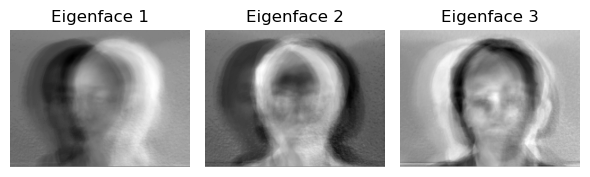

In [21]:
from KNN import eigenfaces

fig, axes = plt.subplots(1, 3, figsize=(6, 2)) 

eigenface_indices = [0, 1, 2]
for i, ax in zip(eigenface_indices, axes):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()

**<span style="font-size:0.8em;">Figure 6: Eigenfaces 1-3 of our training set.</span>**

Another Problem is that the pictures don't seem to be centered??. In figure 6, the first three eigenfaces are depicted. It is evident that there is a range in which the faces lie, but they don't overlap totally, which distorts the eigenfaces. This hits at a difficulty for the KNN algorithm because it operates based on the shortest distance. A solution is to center the pictures by hand/with an additional program/algorithm or the use of another classifier.
In this program KNN was used to identify the faces. It is a simple and effective algorithm when dealing with uncovered frontal faces where all the facial features are visible (Guo, 2021). Although, in our data set all pictures were frontal and uncovered, the display of emotion, different lighting conditions and whether they wore glasses or not could pose a problem for the KNN algorithm and lower the accuracy. Another classifier to use on this data set could be support vector machine (SVM) or a convolutional neural network (CNN).
Furthermore KNN is a lazy learner, which means there is no training phase because the given data is not generalized by the KNN algorithm. The new data has to be compared with the whole training set which can take a lot of time depending on the data set.

In conclusion the accuracy of 71,99% represents an acceptable result considering the data set and the classifier was achieved. However, as listed above there are many different approaches to improve the accuracy of face recognition.

<div style="page-break-after: always;"></div>

## References
[a] Gareth, J. et al. An introduction to statistical learning. Springer New York (2013). Chapter 2.2
-> in chapter 12.5 -> PCA

[b] Losada, D. E., Fernández-Luna, J. M. Advances in Information Retrieval: 27th European Conference on IR Research, ECIR 2005, Santiago de Compostela, Spain, March 21-23, 2005, Proceedings. Springer Berlin, Heidelberg (2005). Chapter “Modified LSI Model for Efficient Search by Metric Access Methods.”, 5.1

[c] International Vocabulary of Metrology–Basic and General Concepts and Associated Terms. (2008). Chemistry International -- Newsmagazine for IUPAC 30, 21-22. doi:10.1515/ci.2008.30.6.21.

[d] Guo, G., Wang, H., Bell, D., Bi, Y., and Greer, K. (2003). KNN Model-Based Approach in Classification.  held in Berlin, Heidelberg, 2003//. R. Meersman, Z. Tari, and D.C. Schmidt, eds. (Springer Berlin Heidelberg), pp. 986-996.

Parveen, P., and Thuraisingham, B. (2006). Face Recognition Using Multiple Classifiers. 13-15 Nov. 2006. pp. 179-186.

Guo, X. (2021). A KNN Classifier for Face Recognition. 14-16 May 2021. pp. 292-297.
